In [1]:
import numpy as np
import pandas as pd

In [2]:
WL_extensions = ['age', 'entry', 'hand', 'ht', 'id', 'ioc', 'name', 'rank', 'rank_points', 'seed']

def obscure_features(DF):
    '''
    We replace 'winner' and 'loser' with 'player_1' and 'player_2' (not necessarily in that order)
    'player_1' replaces the name of the player that comes first alphabetically
    The purpose of this is to predict the winner of a match without the data being tied to
    the known winner or loser.
    '''
    DF['player_1'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).min(axis = 1)
    DF['player_2'] = pd.concat([DF['winner_name'], DF['loser_name']], axis = 1).max(axis = 1)
    
    for ext in WL_extensions:
        p1_feature = np.where(DF['player_1'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        p2_feature = np.where(DF['player_2'] == DF['winner_name'],
                     DF['winner_' + ext],
                     DF['loser_' + ext])
    
        DF['player_1_' + ext] = p1_feature
        DF['player_2_' + ext] = p2_feature
        
    winner_cols = list(filter(lambda x: x.startswith('winner'), DF.columns))
    loser_cols = list(filter(lambda x: x.startswith('loser'), DF.columns))
    cols_to_drop = winner_cols + loser_cols
    
    target = DF['winner_name']
    
    DF.drop(cols_to_drop, axis = 1, inplace = True)
    
    DF['winner'] = target
    
    return DF

In [3]:
# Combine data from years 2000-2019

df_list = [pd.read_csv('wta_matches_' + str(year) + '.csv') for year in range(2000,2020)]

In [4]:
matches = obscure_features(pd.concat(df_list, axis = 0))

In [5]:
matches.index = range(matches.shape[0])

In [6]:
# Player rankings from 2000-2019

rankings_10s = pd.read_csv('wta_rankings_10s.csv', header = None)
rankings_10s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings_00s = pd.read_csv('wta_rankings_00s.csv', header = None)
rankings_00s.columns = ['week', 'ranking', 'player_id', 'ranking_points', 'tours']

rankings = pd.concat([rankings_00s, rankings_10s])

rankings.index = range(rankings.shape[0])

rankings

,week,ranking,player_id,ranking_points,tours
0,20000101,1,200001,6074.0,NaN
1,20000103,1,200001,6074.0,NaN
2,20000110,1,200001,6074.0,NaN
3,20000117,1,200001,6003.0,NaN
4,20000124,1,200001,6003.0,NaN
...,...,...,...,...,...
1208119,20141110,1242,223123,3.0,NaN
1208120,20191209,1047,223179,NaN,NaN
1208121,20191216,996,223179,NaN,NaN
1208122,20191223,948,223179,NaN,NaN


In [7]:
# Convert ranking dates to datetime

rankings['week'] = pd.to_datetime(rankings['week'], format = '%Y%m%d')
rankings.head()

,week,ranking,player_id,ranking_points,tours
0,2000-01-01,1,200001,6074.0,NaN
1,2000-01-03,1,200001,6074.0,NaN
2,2000-01-10,1,200001,6074.0,NaN
3,2000-01-17,1,200001,6003.0,NaN
4,2000-01-24,1,200001,6003.0,NaN


In [8]:
from datetime import timedelta, date

In [9]:
# Convert tournament dates to datetime

matches['tourney_date'] = pd.to_datetime(matches.tourney_date, format = '%Y%m%d')
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [10]:
import re

In [11]:
#remove rows whose scores contain letters, indicating a retirement, default, or walkover

score_mask = matches['score'].apply(lambda x: bool(re.findall('[a-zA-Z]', x)))
matches = matches[~score_mask]
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6(6) 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6(1) 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6(4) 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [12]:
# remove parenthetical portion of score for tie-breakers

scores = matches['score'].copy()
matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))
matches

<ipython-input-12-3360d3b89326>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['score'] = scores.apply(lambda score: re.sub('\(\d*\)', '', score))


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_ioc,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,JPN,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,CHN,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,USA,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,USA,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,CZE,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,GER,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,SUI,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,SUI,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,SUI,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens


In [13]:
# Function indicating number of games played in match

def total_games(s):
    num_list = re.findall('\d+', s)
    num_list = [int(x) for x in num_list]
    return sum(num_list)

matches['total_games'] = matches['score'].apply(total_games)
matches

<ipython-input-13-e46ce7fac0a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches['total_games'] = matches['score'].apply(total_games)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58138,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
58139,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
58140,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
58141,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [14]:
matches.index = range(matches.shape[0])
matches

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,1,7-6 6-2,3,RR,...,Na Li,Shinobu Asagoe,190.0,125.0,121.0,205.0,NaN,NaN,Na Li,21
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,2000-04-30,2,6-4 6-2,3,RR,...,Ai Sugiyama,Jing Qian Yi,22.0,96.0,1230.0,319.0,NaN,NaN,Ai Sugiyama,18
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,1,7-6 6-2,3,RR,...,Justine Henin,Monica Seles,48.0,4.0,661.0,3255.0,NaN,NaN,Monica Seles,21
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,2000-11-22,2,7-6 4-6 6-3,3,RR,...,Kim Clijsters,Lindsay Davenport,18.0,2.0,1398.0,5022.0,NaN,NaN,Lindsay Davenport,32
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,2000-11-21,1,5-7 6-4 6-3,3,RR,...,Arantxa Sanchez Vicario,Daja Bedanova,9.0,54.0,2132.0,610.0,NaN,NaN,Arantxa Sanchez Vicario,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-W-FC-2019-WG-PO-LAT-GER-01,Fed Cup WG R1: LAT vs GER,Hard,4,D,2019-04-19,3,6-4 6-3,3,RR,...,Jelena Ostapenko,Mona Barthel,29.0,90.0,1665.0,689.0,NaN,NaN,Mona Barthel,19
56283,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,1,6-2 6-3,3,RR,...,Madison Keys,Viktorija Golubic,14.0,80.0,3011.0,764.0,NaN,NaN,Viktorija Golubic,17
56284,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,2,6-4 6-3,3,RR,...,Sloane Stephens,Timea Bacsinszky,8.0,111.0,4386.0,579.0,NaN,NaN,Sloane Stephens,19
56285,2019-W-FC-2019-WG-PO-USA-SUI-01,Fed Cup WG R1: USA vs SUI,Hard,4,D,2019-04-20,3,6-3 6-2,3,RR,...,Sloane Stephens,Viktorija Golubic,8.0,80.0,4386.0,764.0,NaN,NaN,Sloane Stephens,17


In [15]:
# Arrange matches chronologically
# This will be important, as many added features are based on a player's previous performance

matches2 = matches.copy().sort_values(by = ['tourney_date', 'tourney_id', 'match_num'])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
1995,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1996,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
1997,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
1998,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
1999,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54121,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
54122,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
54123,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
54124,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [16]:
matches2.index = range(matches2.shape[0])
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_name,player_2_name,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,Alicia Molik,Magdalena Maleeva,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,Magdalena Grzybowska,Tathiana Garbin,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,Nathalie Dechy,Nicole Pratt,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,Conchita Martinez,Sylvia Plischke,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,Barbara Rittner,Magui Serna,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,Aliaksandra Sasnovich,Jil Belen Teichmann,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,Ana Bogdan,Ekaterina Alexandrova,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,Aliaksandra Sasnovich,Greetje Minnen,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,Ekaterina Alexandrova,Nicole Gibbs,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21


In [17]:
# want to add columns containing head-to-heads between players from previous matches.

# first add column with both players' names

matches2['players'] = list(zip(matches2['player_1_name'], matches2['player_2_name']))
matches2

g = matches2.groupby('players')
df_list = []

#group by (player_1_name, player_2_name) and keep running total of wins by each player

for group, df in g:
    df = df[['winner']]
    
    n = df.shape[0]
    
    player_1_h2h = np.zeros(n)
    player_2_h2h = np.zeros(n)
    
    p1 = group[0]
    p2 = group[1]

    for i in range(1,n):
        if df.iloc[i-1,0] == p1:
            player_1_h2h[i] = player_1_h2h[i-1] + 1
            player_2_h2h[i] = player_2_h2h[i-1]
        else:
            player_1_h2h[i] = player_1_h2h[i-1]
            player_2_h2h[i] = player_2_h2h[i-1] + 1
            
    df['player_1_h2h'] = player_1_h2h
    df['player_2_h2h'] = player_2_h2h
    
    df_list.append(df)

<ipython-input-17-9b62f9672b42>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_1_h2h'] = player_1_h2h
<ipython-input-17-9b62f9672b42>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_2_h2h'] = player_2_h2h


In [18]:
# combine the above into single data frame

df_h2h = pd.concat(df_list, axis = 0)
df_h2h

,winner,player_1_h2h,player_2_h2h
36642,Abigail Guthrie,0.0,0.0
36585,Abigail Guthrie,0.0,0.0
5471,Adriana Serra Zanetti,0.0,0.0
21417,Ahsha Rolle,0.0,0.0
16294,Aiko Nakamura,0.0,0.0
...,...,...,...
20259,Yurika Sema,0.0,0.0
20273,Yurika Sema,0.0,0.0
41539,Zarina Diyas,0.0,0.0
22520,Yung Jan Chan,0.0,0.0


In [19]:
df_h2h = df_h2h.drop('winner', axis = 1)
df_h2h

,player_1_h2h,player_2_h2h
36642,0.0,0.0
36585,0.0,0.0
5471,0.0,0.0
21417,0.0,0.0
16294,0.0,0.0
...,...,...
20259,0.0,0.0
20273,0.0,0.0
41539,0.0,0.0
22520,0.0,0.0


In [20]:
#merge with matches2 data frame

matches2 = pd.merge(matches2, df_h2h, left_index = True, right_index = True)
matches2 = matches2.drop('players', axis = 1)
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [21]:
# impute missing player rankings

n = matches2.shape[0]

p1_rank_missing = matches2['player_1_rank'].isnull()
p2_rank_missing = matches2['player_2_rank'].isnull()

for i in range(n):
    if p1_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p1_id = matches2.loc[i, 'player_1_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p1_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_1_rank'] = rankings.loc[mask, 'ranking'][0]
            
    if p2_rank_missing[i]:
        week = matches2.loc[i, 'tourney_date']
        week -= timedelta(week.weekday())
        p2_id = matches2.loc[i, 'player_2_id']
        
        mask = (rankings['week'] == week) & (rankings['player_id'] == p2_id)
        if rankings[mask].shape[0] > 1:
            matches2.loc[i, 'player_2_rank'] = rankings.loc[mask, 'ranking'][0]
            
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_rank,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,96.0,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,202.0,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,25.0,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,15.0,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,59.0,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,67.0,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,105.0,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,67.0,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,42.0,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0


In [22]:
#rankings from Rome 2004 tournament are still missing, for some reason
#some rankings for this week appear to be missing from the rankings data frame
#impute with rankings from the week before instead

rome_indices = matches2[matches2['tourney_id'] == '2004-W-T1-ITA-01A-2004'].index

for i in rome_indices:
    p1_id = matches2.loc[i, 'player_1_id']
    p2_id = matches2.loc[i, 'player_2_id']
    
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p1_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_1_rank'] = rankings.loc[idx, 'ranking']
        
    mask = (rankings['week'] == '05-03-2004') & (rankings['player_id'] == p2_id)
    idx = rankings[mask].index[0]
    matches2.loc[i, 'player_2_rank'] = rankings.loc[idx, 'ranking']

In [23]:
# a column indicating whether the match was won by player 1 or player 2
# will serve as the target variable for machine learning models

matches2['target'] = np.where(matches2['winner'] == matches2['player_1_name'],
                              'player_1',
                              'player_2')
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_rank,player_1_rank_points,player_2_rank_points,player_1_seed,player_2_seed,winner,total_games,player_1_h2h,player_2_h2h,target
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,76.0,305.0,385.0,NaN,NaN,Magdalena Maleeva,13,0.0,0.0,player_2
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,126.0,107.0,222.0,NaN,NaN,Tathiana Garbin,17,0.0,0.0,player_2
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,56.0,1022.0,548.0,6,NaN,Nathalie Dechy,14,0.0,0.0,player_1
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,35.0,1564.0,808.0,3,NaN,Conchita Martinez,19,0.0,0.0,player_1
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,39.0,524.0,715.0,NaN,NaN,Barbara Rittner,27,0.0,0.0,player_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,73.0,858.0,827.0,NaN,NaN,Aliaksandra Sasnovich,21,0.0,0.0,player_1
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,42.0,657.0,1325.0,NaN,1,Ekaterina Alexandrova,18,0.0,0.0,player_2
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,118.0,858.0,555.0,NaN,NaN,Aliaksandra Sasnovich,24,0.0,0.0,player_1
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,142.0,1325.0,432.0,1,NaN,Ekaterina Alexandrova,21,0.0,0.0,player_1


In [24]:
# a column indicating a player's overall win % prior to the match

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby('player')

df_list = []
for group, df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_matches',
                  'player_' + str(int(group)) + '_wins']
    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-24-8811e3cfb97b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-24-8811e3cfb97b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [25]:
def winpct(x, y):
    '''
    Find a player's win %
    x = number of matches
    y = number of wins
    if x = 0, return 0
    '''
    if x == 0:
        return 0
    else:
        return y/x

winpct_vec = np.vectorize(winpct, otypes=[np.float])
matches2['player_1_win_pct'] = winpct_vec(matches2['player_1_matches'], matches2['player_1_wins'])
matches2['player_2_win_pct'] = winpct_vec(matches2['player_2_matches'], matches2['player_2_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,total_games,player_1_h2h,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,13,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,17,0.0,0.0,player_2,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,14,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,19,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,27,0.0,0.0,player_1,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,21,0.0,0.0,player_1,168,82,51,24,0.488095,0.470588
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,18,0.0,0.0,player_2,98,42,116,61,0.428571,0.525862
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,24,0.0,0.0,player_1,169,83,16,8,0.491124,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,21,0.0,0.0,player_1,117,62,109,43,0.529915,0.394495


In [26]:
# a column indicating a player's recent form
# recent form is overall win % plus a "penalty" of log10(1-(overall win % ) + (last 6 months win %))

n = matches2.shape[0]

player_1_recent_form = np.zeros(n)
player_2_recent_form = np.zeros(n)

for i in range(n):
    p1 = matches2.loc[i, 'player_1_name']
    p2 = matches2.loc[i, 'player_2_name']
    
    current_date = matches2.loc[i, 'tourney_date']
    match_number = matches2.loc[i, 'match_num']
    
    mask1 = matches2['tourney_date'] < current_date
    mask2 = (matches2['tourney_date'] == current_date) & (matches2['match_num'] < match_number)
    mask3 = matches2['tourney_date'] >= current_date - timedelta(180)
    
    recent_matches = matches2[(mask1 | mask2) & mask3]
    
    mask4 = (recent_matches['player_1_name'] == p1) | (recent_matches['player_2_name'] == p1)
    mask5 = (recent_matches['winner'] == p1)
    
    p1_matches = recent_matches[mask4].shape[0]
    p1_wins = recent_matches[mask5].shape[0]
    
    if p1_wins >= 10:
        player_1_recent_form[i] = (matches2.loc[i, 'player_1_win_pct']
                                   + np.log10(1 - matches2.loc[1, 'player_1_win_pct']
                                              + winpct(p1_matches, p1_wins)))
    else:
        player_1_recent_form[i] = matches2.loc[i, 'player_1_win_pct']
    
    mask6 = (recent_matches['player_1_name'] == p2) | (recent_matches['player_2_name'] == p2)
    mask7 = (recent_matches['winner'] == p2)
    
    p2_matches = recent_matches[mask6].shape[0]
    p2_wins = recent_matches[mask7].shape[0]
    
    if p2_wins >= 10:
        player_2_recent_form[i] = (matches2.loc[i, 'player_2_win_pct']
                                   + np.log10(1 - matches2.loc[1, 'player_2_win_pct']
                                              + winpct(p2_matches, p2_wins)))
    else:
        player_2_recent_form[i] = matches2.loc[i, 'player_2_win_pct']

In [27]:
matches2['player_1_recent_form'] = player_1_recent_form
matches2['player_2_recent_form'] = player_2_recent_form
matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_h2h,target,player_1_matches,player_1_wins,player_2_matches,player_2_wins,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.0,player_2,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.0,player_1,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.0,player_1,168,82,51,24,0.488095,0.470588,0.488095,0.470588
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.0,player_2,98,42,116,61,0.428571,0.525862,0.428571,0.735562
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.0,player_1,169,83,16,8,0.491124,0.500000,0.491124,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.0,player_1,117,62,109,43,0.529915,0.394495,0.742989,0.394495


In [28]:
print('number of observations with \'surface\' missing:', matches2['surface'].isnull().sum())

# there are 124 matches with the feature 'surface' missing
# however, many of these matches are from the same tournament
# this makes it feasible to look up these tournaments and impute the exact values.
missing_surface = matches2[matches2['surface'].isnull()][['tourney_name', 'tourney_date']]
for i in missing_surface.index:
    print(str(i)+':', missing_surface.loc[i, 'tourney_name'], missing_surface.loc[i, 'tourney_date'])

number of observations with 'surface' missing: 124
18341: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
18342: Fed Cup G2 PO: IRL vs GRE 2006-04-29 00:00:00
20907: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20908: Fed Cup G1 PO: UZB vs IND 2007-04-21 00:00:00
20909: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20910: Fed Cup G1 PO: NZL vs HKG 2007-04-21 00:00:00
20911: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
20912: Fed Cup G1 PO: KOR vs KAZ 2007-04-21 00:00:00
23000: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23001: Fed Cup G1 PO: NZL vs UZB 2008-02-02 00:00:00
23018: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23019: Fed Cup G1 PO: MEX vs PAR 2008-02-02 00:00:00
23022: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23023: Fed Cup G1 PO: IND vs HKG 2008-02-02 00:00:00
23028: Fed Cup G2 PO: KAZ vs KOR 2008-02-02 00:00:00
23029: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23030: Fed Cup G2 PO: PHI vs SIN 2008-02-02 00:00:00
23031: Fed Cup G2 PO: SYR vs TKM 2008-02-02 00:0

In [29]:
# Surfaces to impute, listed by index

missing_surface_dict = {18341: 'Clay',
                        18342: 'Clay',
                        20907: 'Hard',
                        20908: 'Hard',
                        20909: 'Hard',
                        20910: 'Hard',
                        20911: 'Hard',
                        20912: 'Hard',
                        23000: 'Hard',
                        23001: 'Hard',
                        23018: 'Clay',
                        23019: 'Clay',
                        23022: 'Hard',
                        23023: 'Hard',
                        23028: 'Hard',
                        23029: 'Hard',
                        23030: 'Hard',
                        23031: 'Hard',
                        23032: 'Hard',
                        34517: 'Clay',
                        34518: 'Clay',
                        34519: 'Clay',
                        34520: 'Clay',
                        34521: 'Clay',
                        34522: 'Clay',
                        34523: 'Clay',
                        34524: 'Clay',
                        39936: 'Hard',
                        39937: 'Hard',
                        39938: 'Hard',
                        39939: 'Hard',
                        39940: 'Hard',
                        39941: 'Hard',
                        39942: 'Hard',
                        39943: 'Hard',
                        39944: 'Hard',
                        39945: 'Hard',
                        39946: 'Hard',
                        39947: 'Hard',
                        41734: 'Hard',
                        41735: 'Hard',
                        41736: 'Hard',
                        44676: 'Hard',
                        44677: 'Hard',
                        44678: 'Hard',
                        44679: 'Hard',
                        44680: 'Hard',
                        44681: 'Hard',
                        44682: 'Hard',
                        44683: 'Hard',
                        44712: 'Hard',
                        44713: 'Hard',
                        44714: 'Hard',
                        44715: 'Hard',
                        44716: 'Hard',
                        44717: 'Hard',
                        44718: 'Hard',
                        44719: 'Hard',
                        44748: 'Hard',
                        44749: 'Hard',
                        44750: 'Hard',
                        44751: 'Hard',
                        44752: 'Hard',
                        44753: 'Hard',
                        44754: 'Hard',
                        44755: 'Hard',
                        44784: 'Hard',
                        44785: 'Hard',
                        44786: 'Hard',
                        44787: 'Hard',
                        44788: 'Hard',
                        44789: 'Hard',
                        44790: 'Hard',
                        44791: 'Hard',
                        44818: 'Hard',
                        44819: 'Hard',
                        44820: 'Hard',
                        44821: 'Hard',
                        44822: 'Hard',
                        44823: 'Hard',
                        44824: 'Hard',
                        44825: 'Hard',
                        49231: 'Clay',
                        49232: 'Clay',
                        49233: 'Clay',
                        49234: 'Clay',
                        49235: 'Clay',
                        49236: 'Clay',
                        49237: 'Clay',
                        49238: 'Clay',
                        49239: 'Clay',
                        49240: 'Clay',
                        49241: 'Clay',
                        49242: 'Clay',
                        49243: 'Clay',
                        49244: 'Clay',
                        49245: 'Clay',
                        49246: 'Clay',
                        49247: 'Clay',
                        49248: 'Clay',
                        49249: 'Clay',
                        49250: 'Clay',
                        49281: 'Clay',
                        49282: 'Clay',
                        49283: 'Clay',
                        49284: 'Clay',
                        49285: 'Clay',
                        49286: 'Clay',
                        49287: 'Clay',
                        49288: 'Clay',
                        49289: 'Clay',
                        49290: 'Clay',
                        49299: 'Clay',
                        49300: 'Clay',
                        49301: 'Clay',
                        49302: 'Clay',
                        49303: 'Clay',
                        49304: 'Clay',
                        49305: 'Clay',
                        49306: 'Clay',
                        49307: 'Clay',
                        49308: 'Clay',
                        49309: 'Clay',
                        49310: 'Clay',
                       }

In [30]:
for idx, surface in missing_surface_dict.items():
    matches2.loc[idx, 'surface'] = surface

In [31]:
matches2['surface'].isnull().sum() #all missing 'surface' values imputed

0

In [32]:
# player's win % on surface

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'surface', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'surface', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['surface', 'player'])

df_list = []
for (group, surface), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
all_players = pd.concat(df_list, axis = 0)

for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'surface', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_surface_matches',
                  'player_' + str(int(group)) + '_surface_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-32-58c05022c03e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-32-58c05022c03e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [33]:
matches2['player_1_surface_win_pct'] = winpct_vec(matches2['player_1_surface_matches'],
                                                  matches2['player_1_surface_wins'])
matches2['player_2_surface_win_pct'] = winpct_vec(matches2['player_2_surface_matches'],
                                                  matches2['player_2_surface_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_win_pct,player_2_win_pct,player_1_recent_form,player_2_recent_form,player_1_surface_matches,player_1_surface_wins,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,1,6-0 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,2,6-2 6-3,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,3,6-0 6-2,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,4,6-3 6-4,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,T3,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,0.488095,0.470588,0.488095,0.470588,123,65,27,10,0.528455,0.370370
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,0.428571,0.525862,0.428571,0.735562,59,26,82,50,0.440678,0.609756
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,0.491124,0.500000,0.491124,0.500000,124,66,10,5,0.532258,0.500000
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,0.529915,0.394495,0.742989,0.394495,83,51,95,41,0.614458,0.431579


In [34]:
matches2['tourney_level'].value_counts()

#different tournament levels:
    #I: international
    #G: grand slam
    #P: premier
    #D: fed cup
    #T1: tier 1 (no longer in existence, roughly equivalent to PM)
    #T3: tier 3 (no longer in existence, roughly equivalent to I)
    #T2: tier 2 (no longer in existence, roughly equivalent to P)
    #T4: tier 3 (no longer in existence, roughly equivalent to I)
    #C: challenger/ITF
    #T5: tier 3 (no longer in existence, roughly equivalent to I)
    #CC: challenger/ITF
    #F: Tour finals
    #O: Olympics
    #W: Tour finals

I     10706
G     10014
P      6854
D      6141
T1     4485
T3     4397
T2     4165
PM     3044
T4     2807
C      1323
T5      890
CC      736
F       401
O       309
W        15
Name: tourney_level, dtype: int64

In [35]:
# Remove redundant and outdated tournament levels

matches2['tourney_level'] = matches2['tourney_level'].str.replace('T1', 'PM')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T2', 'P')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T3', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T4', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('T5', 'I')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('W', 'F')
matches2['tourney_level'] = matches2['tourney_level'].str.replace('CC', 'C')
matches2['tourney_level'].value_counts()

I     18800
P     11019
G     10014
PM     7529
D      6141
C      2059
F       416
O       309
Name: tourney_level, dtype: int64

In [36]:
# win % at different tourney levels

n = matches2.shape[0]

p1_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_1_name', 'winner']].copy()
p1_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']
p2_matches = matches2[['tourney_date', 'match_num', 'tourney_level', 'player_2_name', 'winner']].copy()
p2_matches.columns = ['tourney_date', 'match_num', 'tourney_level', 'player', 'winner']

p1_matches['winner'] = (p1_matches['winner'] == p1_matches['player']).astype('int')
p2_matches['winner'] = (p2_matches['winner'] == p2_matches['player']).astype('int')

p1_matches['category'] = np.ones(n)
p2_matches['category'] = np.ones(n)*2

all_players = pd.concat([p1_matches, p2_matches], axis = 0)
all_players = all_players.sort_values(by = ['tourney_date', 'match_num'], axis = 0)

groups = all_players.groupby(['tourney_level', 'player'])

df_list = []
for (group, tourney_level), df in groups:
    df['cumulative_matches'] = range(df.shape[0])
    df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))
    df_list.append(df)
    
    
all_players = pd.concat(df_list, axis = 0)


for group, df in all_players.groupby('category'):
    df = df.drop(['tourney_date', 'match_num', 'tourney_level', 'player', 'winner', 'category'], axis = 1)
    df.columns = ['player_' + str(int(group)) + '_level_matches',
                  'player_' + str(int(group)) + '_level_wins']

    matches2 = pd.merge(matches2, df, left_index = True, right_index = True, sort = True)

<ipython-input-36-2d6cc0779756>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_matches'] = range(df.shape[0])
<ipython-input-36-2d6cc0779756>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_wins'] = df['winner'].cumsum().apply(lambda x: max(0, x - 1))


In [37]:
matches2['player_1_level_win_pct'] = winpct_vec(matches2['player_1_level_matches'],
                                                  matches2['player_1_level_wins'])
matches2['player_2_level_win_pct'] = winpct_vec(matches2['player_2_level_matches'],
                                                  matches2['player_2_level_wins'])

matches2

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
0,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,1,6-0 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
1,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,2,6-2 6-3,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
2,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,3,6-0 6-2,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
3,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,4,6-3 6-4,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
4,2000-W-T3-AUS-01A-2000,Gold Coast,Hard,30,I,2000-01-03,5,6-4 4-6 6-1,3,R32,...,0,0,0.000000,0.000000,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2019-1072,Limoges,Hard,32,I,2019-12-16,295,6-3 7-5,3,QF,...,27,10,0.528455,0.370370,49,24,36,18,0.489796,0.500000
56283,2019-1072,Limoges,Hard,32,I,2019-12-16,297,6-4 6-2,3,QF,...,82,50,0.440678,0.609756,55,23,57,30,0.418182,0.526316
56284,2019-1072,Limoges,Hard,32,I,2019-12-16,298,2-6 6-2 6-2,3,SF,...,10,5,0.532258,0.500000,50,25,13,7,0.500000,0.538462
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [38]:
#there is an overabundance of the value 0 in many engineered features,
#which will lead to inaccuracy in predictions
#to resolve this, restrict to matches in which both players have played at least 100 matches
#thus, the following predictive models should only be used to predict winner between players who have played
#100 matches in their career at the 8 tournament levels considered in this project

mask = (matches2['player_1_matches'] >= 100) & (matches2['player_2_matches'] >= 100)
matches3 = matches2[mask].copy()

print(matches3.shape[0])
matches3 #we still have 18000+ observations

18185


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_2_surface_matches,player_2_surface_wins,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_matches,player_1_level_wins,player_2_level_matches,player_2_level_wins,player_1_level_win_pct,player_2_level_win_pct
5250,2001-W-T2-USA-06A-2001,New Haven,Hard,28,P,2001-08-19,24,6-4 6-3,3,QF,...,59,43,0.560976,0.728814,24,14,17,9,0.583333,0.529412
5350,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,98,6-4 7-5,3,R32,...,44,26,0.613636,0.590909,25,18,23,16,0.720000,0.695652
5365,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,113,6-4 6-0,3,R16,...,86,75,0.577778,0.872093,24,16,41,34,0.666667,0.829268
5367,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,115,6-3 0-6 6-3,3,R16,...,86,73,0.488889,0.848837,19,11,36,31,0.578947,0.861111
5372,2001-W-SL-USA-01A-2001,US Open,Hard,128,G,2001-08-27,120,6-3 6-3,3,R16,...,64,47,0.543860,0.734375,24,16,38,33,0.666667,0.868421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,2019-1072,Limoges,Hard,32,I,2019-12-16,281,6-4 6-4,3,R32,...,61,25,0.511450,0.409836,115,63,74,36,0.547826,0.486486
56272,2019-1072,Limoges,Hard,32,I,2019-12-16,285,6-4 2-6 6-3,3,R32,...,293,148,0.600000,0.505119,55,28,166,92,0.509091,0.554217
56278,2019-1072,Limoges,Hard,32,I,2019-12-16,291,6-3 6-3,3,R16,...,266,130,0.403226,0.488722,75,36,215,113,0.480000,0.525581
56285,2019-1072,Limoges,Hard,32,I,2019-12-16,299,7-6 6-2,3,SF,...,95,41,0.614458,0.431579,58,31,39,13,0.534483,0.333333


In [39]:
p1_missing_rank = matches3[matches3['player_1_rank'].isnull()][['player_1_name', 'player_1_id', 'tourney_name', 'tourney_date']]
p1_missing_rank
#there are still some rankings missing
#these are players that were unranked at the time of the match

,player_1_name,player_1_id,tourney_name,tourney_date
19074,Chanda Rubin,200039,Stanford,2006-07-24
19382,Chanda Rubin,200039,US Open,2006-08-28
19592,Chanda Rubin,200039,Luxembourg,2006-09-25
19603,Chanda Rubin,200039,Luxembourg,2006-09-25
19769,Elena Bovina,200764,Moscow,2006-10-09
22703,Jelena Dokic,200120,Hobart,2008-01-07
27314,Kim Clijsters,200079,Cincinnati,2009-08-10
27337,Kim Clijsters,200079,Cincinnati,2009-08-10
27352,Kim Clijsters,200079,Cincinnati,2009-08-10
27391,Kim Clijsters,200079,Toronto,2009-08-17


In [40]:
p2_missing_rank = matches3[matches3['player_2_rank'].isnull()][['player_2_name', 'player_2_id', 'tourney_name', 'tourney_date']]
p2_missing_rank

,player_2_name,player_2_id,tourney_name,tourney_date
12228,Sandrine Testud,200016,Doha,2004-03-01
12239,Sandrine Testud,200016,Doha,2004-03-01
14771,Martina Hingis,200001,Pattaya,2005-01-31
17265,Martina Hingis,200001,Gold Coast,2006-01-02
17274,Martina Hingis,200001,Gold Coast,2006-01-02
17281,Martina Hingis,200001,Gold Coast,2006-01-02
17319,Martina Hingis,200001,Sydney,2006-01-09
22093,Yoon Jeong Cho,201313,US Open,2007-08-27
27275,Meghann Shaughnessy,200046,Los Angeles,2009-08-03
27358,Kim Clijsters,200079,Cincinnati,2009-08-10


In [41]:
# all players above are unranked because of long layoffs
# (coming out of retirement and/or returning from injury)
# the lowest ranking in the data set is approx. 1300, which could be used as a stand-in for 'unranked'
# however, imputing for 'unranked' in this way may not accurately reflect the player's potential of winning
# e.g. Kim Clijsters won the US Open as an unranked player after returning from a 2+ year retirement
# she was a highly accomplished player before her retirement, and imputed ranking should ideally reflect this
# imputation strategy: find the player's ranking at the time they played their last match before layoff
# penalize this ranking by the length of the layoff (add 1 to ranking per month since last match)

In [42]:
for i in p1_missing_rank.index:
    player_id = p1_missing_rank.loc[i, 'player_1_id']
    current_date = p1_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_1_id'] == player_id))
             & (~matches2['player_1_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_1_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)
    
for i in p2_missing_rank.index:
    player_id = p2_missing_rank.loc[i, 'player_2_id']
    current_date = p2_missing_rank.loc[i, 'tourney_date']
    
    mask1 = (((matches2['tourney_date'] < current_date)
              & (matches2['player_2_id'] == player_id))
             & (~matches2['player_2_rank'].isnull()))
    matches_partial = matches2[mask1]
    last_match = matches_partial.loc[matches_partial.index[-1], 'tourney_date']
    
    mask2 = (rankings['week'] < last_match) & (rankings['player_id'] == player_id)
    rankings_partial = rankings[mask2]
    ranking_to_impute = rankings_partial.loc[rankings_partial.index[-1], 'ranking']
    
    matches3.loc[i, 'player_2_rank'] = ranking_to_impute + round((current_date - last_match).days / 30)

In [43]:
matches3.loc[p1_missing_rank.index][['player_1_name', 'player_1_rank']] #rankings imputed

,player_1_name,player_1_rank
19074,Chanda Rubin,136.0
19382,Chanda Rubin,138.0
19592,Chanda Rubin,138.0
19603,Chanda Rubin,138.0
19769,Elena Bovina,31.0
22703,Jelena Dokic,394.0
27314,Kim Clijsters,34.0
27337,Kim Clijsters,34.0
27352,Kim Clijsters,34.0
27391,Kim Clijsters,34.0


In [44]:
matches3.loc[p2_missing_rank.index][['player_2_name', 'player_2_rank']] #rankings imputed

,player_2_name,player_2_rank
12228,Sandrine Testud,31.0
12239,Sandrine Testud,31.0
14771,Martina Hingis,38.0
17265,Martina Hingis,49.0
17274,Martina Hingis,49.0
17281,Martina Hingis,49.0
17319,Martina Hingis,50.0
22093,Yoon Jeong Cho,93.0
27275,Meghann Shaughnessy,77.0
27358,Kim Clijsters,32.0


In [45]:
matches3.isnull().sum()[matches3.isnull().sum() > 0]

# all remaining columns containing missingness will not be used in predictive models

minutes                 13281
w_ace                    4294
w_df                     4310
w_svpt                   4293
w_1stIn                  4293
w_1stWon                 4293
w_2ndWon                 4293
w_SvGms                 12491
w_bpSaved                4296
w_bpFaced                4296
l_ace                    4296
l_df                     4310
l_svpt                   4293
l_1stIn                  4293
l_1stWon                 4293
l_2ndWon                 4293
l_SvGms                 12491
l_bpSaved                4295
l_bpFaced                4295
player_1_entry          16553
player_2_entry          16288
player_1_ht              3979
player_2_ht              3520
player_1_rank_points       61
player_2_rank_points       55
player_1_seed            9298
player_2_seed            9806
dtype: int64

In [46]:
# Some values of 'hand' are missing in the form of a 'U' standing in for 'R' or 'L'

matches3[matches3['player_1_hand'] == 'U']['player_1_name']

23654      Camille Pin
24160      Camille Pin
24247      Camille Pin
24259      Camille Pin
24582      Camille Pin
24645      Camille Pin
25016      Camille Pin
25117      Camille Pin
25483      Camille Pin
26186      Camille Pin
26669      Camille Pin
27465      Camille Pin
37878    Olga Puchkova
38301    Olga Puchkova
Name: player_1_name, dtype: object

In [47]:
matches3[matches3['player_2_hand'] == 'U']['player_2_name']

25825      Camille Pin
25861      Camille Pin
26400      Camille Pin
37788    Olga Puchkova
38563    Olga Puchkova
Name: player_2_name, dtype: object

In [48]:
# Only players for whom handedness is 'U' (unknown) are Camille Pin and Olga Puchkova
# Both are right-handed per a quick internet search, so can replace each U with R

matches3['player_1_hand'] = matches3['player_1_hand'].str.replace('U', 'R')
matches3['player_2_hand'] = matches3['player_2_hand'].str.replace('U', 'R')

In [49]:
matches3['h2h_diff'] = matches3['player_1_h2h'] - matches3['player_2_h2h']
matches3['recent_form_diff'] = matches3['player_1_recent_form'] - matches3['player_2_recent_form']
matches3['surface_diff'] = matches3['player_1_surface_win_pct'] - matches3['player_2_surface_win_pct']
matches3['level_diff'] = matches3['player_1_level_win_pct'] - matches3['player_2_level_win_pct']
matches3['log_player_1_rank'] = np.log(matches3['player_1_rank'])
matches3['log_player_2_rank'] = np.log(matches3['player_2_rank'])
matches3['log_rank_ratio'] = matches3['log_player_1_rank']-matches3['log_player_2_rank']
matches3['age_diff'] = matches3['player_1_age'] - matches3['player_2_age']

In [50]:
# Features to be used in predictive models
# Will try five different classification models:
    # Gradient boosting
    # Random forest
    # Logistic regression
    # Support vector machine
    # Linear discriminant analysis

X = matches3[['player_1_age',
              'player_2_age',
              'log_player_1_rank',
              'log_player_2_rank',
              'player_1_h2h',
              'player_2_h2h',
              'player_1_recent_form',
              'player_2_recent_form',
              'player_1_surface_win_pct',
              'player_2_surface_win_pct',
              'player_1_level_win_pct',
              'player_2_level_win_pct',
              'surface',
              'tourney_level'
             ]]

y = matches3['target']

In [51]:
X

,player_1_age,player_2_age,log_player_1_rank,log_player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,surface,tourney_level
5250,18.354552,25.390828,2.639057,0.693147,0.0,2.0,0.860988,1.000595,0.560976,0.728814,0.583333,0.529412,Hard,P
5350,29.691992,18.376454,3.044522,2.564949,1.0,1.0,0.877322,0.871237,0.613636,0.590909,0.720000,0.695652,Hard,G
5365,18.376454,20.906229,2.564949,0.000000,0.0,1.0,0.866819,1.101975,0.577778,0.872093,0.666667,0.829268,Hard,G
5367,25.968515,25.218344,3.295837,1.098612,0.0,3.0,0.712341,1.120085,0.488889,0.848837,0.578947,0.861111,Hard,G
5372,25.464750,25.412731,2.944439,0.693147,0.0,0.0,0.785073,1.005230,0.543860,0.734375,0.666667,0.868421,Hard,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56268,25.724846,23.186858,3.850148,4.430817,0.0,1.0,0.721849,0.436508,0.511450,0.409836,0.547826,0.486486,Hard,I
56272,25.084189,32.224504,3.737670,4.762174,0.0,0.0,0.719649,0.470000,0.600000,0.505119,0.509091,0.554217,Hard,I
56278,23.186858,29.691992,4.430817,4.304065,1.0,0.0,0.433071,0.489224,0.403226,0.488722,0.480000,0.525581,Hard,I
56285,25.084189,26.787132,3.737670,4.955827,0.0,0.0,0.742989,0.394495,0.614458,0.431579,0.534483,0.333333,Hard,I


In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [53]:
mask1 = (matches3['player_1_rank'] < matches3['player_2_rank']) & (matches3['target'] == 'player_1')
mask2 = (matches3['player_2_rank'] < matches3['player_1_rank']) & (matches3['target'] == 'player_2')

matches3[mask1 | mask2].shape[0] / matches3.shape[0]

# 66.21% of matches won by higher-ranked player. Treat this as 'baseline' of success for models.

0.6621391256530107

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=106)

In [55]:
# encode categorical variables with numbers
# this is required for ensembling techniques

lencoder = LabelEncoder()

def numer_label(DF):
    '''
    Assign numeric labels to values in non-numeric columns.
    '''
    categ_cols = ['surface', 'tourney_level']
    
    for name in categ_cols:
        DF[name] = lencoder.fit_transform(DF[name])
    return DF

X_train_ens = X_train.copy()
X_test_ens = X_test.copy()

X_train_ens = numer_label(X_train_ens)
X_test_ens = numer_label(X_test_ens)

In [56]:
gbc = GradientBoostingClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [400, 800, 1200],
             'max_depth': [2, 4, 6],
             'subsample': [.7, .8, .9]}

gs = GridSearchCV(gbc, gs_params, cv = 5)

gs.fit(X_train_ens, y_train)

gbc_best = gs.best_estimator_

print(gbc_best)
print(gbc_best.score(X_train_ens, y_train))
print(gbc_best.score(X_test_ens, y_test)) #improvement on baseline
                                          #possibly slight overfitting, but not terribly worrying

GradientBoostingClassifier(max_depth=2, max_features='sqrt', n_estimators=400,
                           subsample=0.9)
0.7282788012097883
0.7082760516909541


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Feature importances (gradient boosting classifier)')

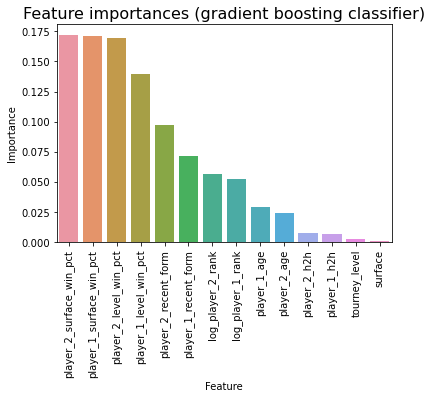

In [58]:
# Feature importances as determined by best gbc model

feat_imp = sorted(list(zip(X_train_ens.columns, gbc_best.feature_importances_)), key = lambda x: -x[1])

feat_imp_df = pd.DataFrame({'feature': [x[0] for x in feat_imp],
                            'importance': [x[1] for x in feat_imp]})

sns.barplot(data = feat_imp_df, x = 'feature', y = 'importance')

plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title('Feature importances (gradient boosting classifier)', size = 16)

In [59]:
rfc = RandomForestClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [400, 800, 1200],
             'max_depth': [2, 4, 6]}

gs = GridSearchCV(rfc, gs_params, cv = 5)
gs.fit(X_train_ens, y_train)

rfc_best = gs.best_estimator_

rfc_best.fit(X_train_ens, y_train)

print(rfc_best)
print(rfc_best.score(X_train_ens, y_train))
print(rfc_best.score(X_test_ens, y_test)) # Improvement on baseline, slight overfitting?

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=400)
0.7206488864448721
0.6989276876546604


Text(0.5, 1.0, 'Feature importances (random forest classifier)')

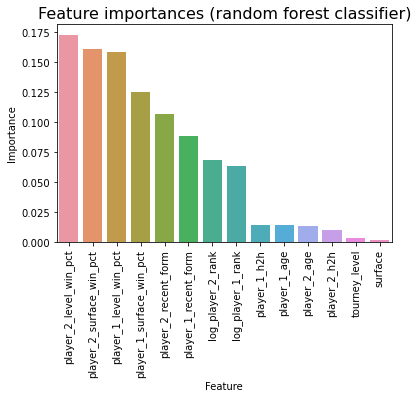

In [60]:
#feature importances as determined by rfc
#similar to gbc features importances.
#only major change is that player ages are notably less important in rfc than in gbc

feat_imp = sorted(list(zip(X_train_ens.columns, rfc_best.feature_importances_)), key = lambda x: -x[1])

feat_imp_df = pd.DataFrame({'feature': [x[0] for x in feat_imp],
                            'importance': [x[1] for x in feat_imp]})

sns.barplot(data = feat_imp_df, x = 'feature', y = 'importance')

plt.xticks(rotation = 90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title('Feature importances (random forest classifier)', size = 16)

In [61]:
X_train_log = X_train.copy()
X_train_log = pd.get_dummies(X_train_log, drop_first = True)

X_test_log = X_test.copy()
X_test_log = pd.get_dummies(X_test_log, drop_first = True)

In [62]:
logit = LogisticRegression(solver='liblinear')

gs_params = {'C': 10**np.linspace(-2, 2, 26)}
gs = GridSearchCV(logit, gs_params, cv = 5)

gs.fit(X_train_log, y_train)

log_best = gs.best_estimator_

print(log_best)
print(log_best.score(X_train_log, y_train))
print(log_best.score(X_test_log, y_test)) #improvement on baseline, no overfitting

LogisticRegression(C=7.585775750291836, solver='liblinear')
0.7062826505361561
0.70552653285675


In [63]:
svc = SVC(kernel = 'poly')

gs_params = {'C': 10**np.linspace(-1, 2, 9),
             'degree': [1,2]}

gs = GridSearchCV(svc, gs_params, cv = 5)

gs.fit(X_train_ens, y_train)
svc_best = gs.best_estimator_

In [64]:
print(svc_best)
print(svc_best.score(X_train_ens, y_train))
print(svc_best.score(X_test_ens, y_test)) #improvement on baseline, no overfitting
                                          #performs better than linear model

SVC(C=100.0, degree=1, kernel='poly')
0.7035331317019522
0.7069012922738521


In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [66]:
lda = LinearDiscriminantAnalysis()

In [67]:
lda.fit(X_train_ens, y_train)

LinearDiscriminantAnalysis()

In [68]:
print(lda.score(X_train_ens, y_train))
print(lda.score(X_test_ens, y_test)) #improvement on baseline, best model so far

0.7064201264778663
0.7074511960406928


In [69]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_ens, y_train)
print(gnb.score(X_train_ens, y_train))
print(gnb.score(X_test_ens, y_test)) #small improvement on baseline

0.6967280725872972
0.6964531207038768


In [70]:
# Want to examine the performance of the best model (LDA) more in-depth

# Specifically, want to study the case when the lower-ranked player is correctly chosen as the winner

lda_predictions = lda.predict(X_test_ens)

pred_rows = matches3.loc[y_test.index].copy()
pred_rows['prediction'] = lda_predictions

pred_rows = pred_rows[['surface',
                       'tourney_level',
                       'target', 
                       'prediction',
                       'player_1_rank',
                       'player_2_rank',
                       'player_1_h2h',
                       'player_2_h2h',
                       'player_1_recent_form',
                       'player_2_recent_form',
                       'player_1_surface_win_pct',
                       'player_2_surface_win_pct',
                       'player_1_level_win_pct',
                       'player_2_level_win_pct']]

pred_rows['correct'] = pred_rows['target'] == pred_rows['prediction']

mask1 = (pred_rows['target'] == 'player_1') & (pred_rows['player_1_rank'] > pred_rows['player_2_rank'])
mask2 = (pred_rows['target'] == 'player_2') & (pred_rows['player_1_rank'] < pred_rows['player_2_rank'])
pred_rows['lower_ranked_won'] = mask1 | mask2
pred_rows

,surface,tourney_level,target,prediction,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,player_1_surface_win_pct,player_2_surface_win_pct,player_1_level_win_pct,player_2_level_win_pct,correct,lower_ranked_won
53876,Hard,P,player_2,player_1,33.0,31.0,0.0,1.0,0.724938,0.694368,0.547170,0.507317,0.483871,0.300000,False,False
14291,Carpet,PM,player_1,player_2,19.0,12.0,0.0,1.0,0.793210,1.142335,0.625000,0.809524,0.565217,0.815789,False,True
29603,Grass,G,player_1,player_1,46.0,26.0,1.0,0.0,0.804789,0.750116,0.500000,0.466667,0.633333,0.416667,True,True
48275,Hard,I,player_1,player_1,44.0,90.0,0.0,0.0,0.703887,0.628646,0.500000,0.469027,0.598802,0.457143,True,False
11061,Hard,P,player_2,player_1,15.0,24.0,2.0,0.0,0.854602,0.755808,0.594340,0.511628,0.542373,0.400000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,Carpet,P,player_2,player_2,20.0,10.0,0.0,1.0,0.742685,1.082090,0.571429,0.888889,0.344828,0.790698,True,False
47493,Hard,I,player_2,player_2,51.0,61.0,1.0,0.0,0.697028,0.731345,0.484277,0.533333,0.512195,0.534483,True,True
28310,Hard,D,player_2,player_2,26.0,12.0,0.0,1.0,0.777548,0.862380,0.528169,0.601942,0.619048,0.750000,True,False
25937,Hard,PM,player_2,player_2,59.0,49.0,0.0,2.0,0.394737,0.794396,0.384615,0.591463,0.318182,0.519231,True,False


In [71]:
pred_rows.groupby('lower_ranked_won').agg({'correct': 'mean'}).reset_index()

# Prediction accuracy for matches where the higher ranked player won
# and where the lower ranked player won

,lower_ranked_won,correct
0,False,0.887036
1,True,0.359451


In [72]:
surfaces_accuracy = pred_rows.groupby(['surface', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
surfaces_accuracy

,surface,lower_ranked_won,correct
0,Carpet,False,0.931818
1,Carpet,True,0.333333
2,Clay,False,0.885217
3,Clay,True,0.355705
4,Grass,False,0.901186
5,Grass,True,0.411765
6,Hard,False,0.884086
7,Hard,True,0.352490


Text(6.799999999999997, 0.5, 'Prediction accuracy')

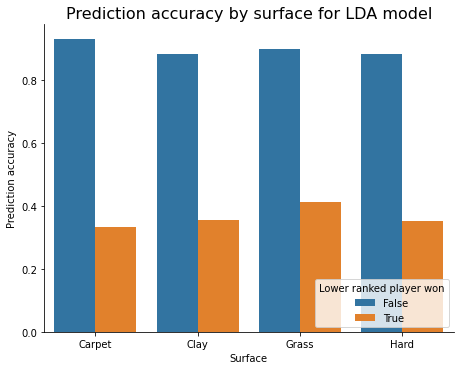

In [73]:
sns.catplot(data = surfaces_accuracy,
            x = 'surface',
            y = 'correct',
            hue = 'lower_ranked_won',
            kind = 'bar',
            legend = False,
            height = 5,
            aspect = 1.3)

plt.title('Prediction accuracy by surface for LDA model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Surface')
plt.ylabel('Prediction accuracy')

In [74]:
levels_accuracy = pred_rows.groupby(['tourney_level', 'lower_ranked_won']).agg({'correct': 'mean'}).reset_index()
levels_accuracy

,tourney_level,lower_ranked_won,correct
0,C,False,0.846154
1,C,True,0.800000
2,D,False,0.910256
3,D,True,0.444444
4,F,False,0.897959
5,F,True,0.416667
6,G,False,0.917864
7,G,True,0.367521
8,I,False,0.828678
9,I,True,0.355872


Text(26.124388888888895, 0.5, 'Prediction accuracy')

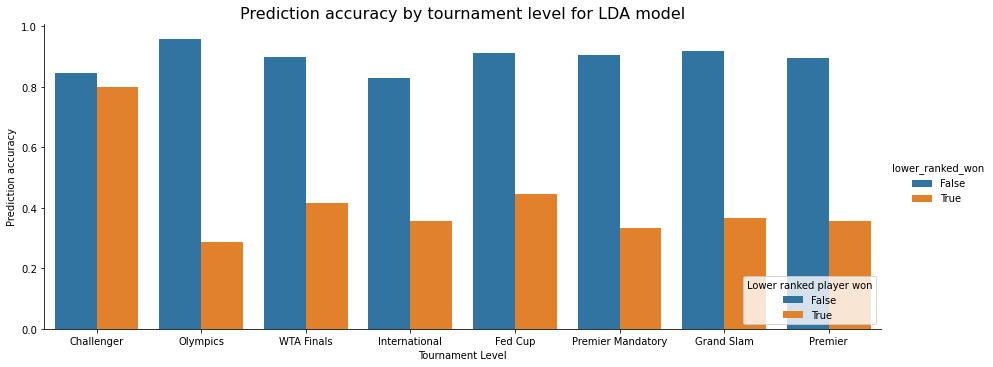

In [75]:
plot =  sns.catplot(data = levels_accuracy,
                    x = 'tourney_level',
                    y = 'correct',
                    hue = 'lower_ranked_won',
                    kind = 'bar',
                    order = ['C', 'O', 'F', 'I', 'D', 'PM', 'G', 'P'],
                    height = 5,
                    aspect = 2.5)
plot.set_xticklabels(['Challenger', 'Olympics',
                      'WTA Finals', 'International',
                      'Fed Cup', 'Premier Mandatory',
                      'Grand Slam', 'Premier'])

plt.title('Prediction accuracy by tournament level for LDA model', size = 16)
plt.legend(title = 'Lower ranked player won', loc = 'lower right')
plt.xlabel('Tournament Level')
plt.ylabel('Prediction accuracy')

In [76]:
# At Challenger, correctly guess winner 83% of the time
# This is due to a huge increase in predictive accuracy for matches in which the higher-ranked player won
# Reasons?

total = pred_rows[pred_rows['tourney_level'].isin(['C'])].shape[0]
correct = pred_rows[pred_rows['tourney_level'].isin(['C']) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.8333333333333334

In [77]:
total = pred_rows[~pred_rows['tourney_level'].isin(['C'])].shape[0]
correct = pred_rows[(~pred_rows['tourney_level'].isin(['C'])) & (pred_rows['correct'] == True)].shape[0]
correct / total

0.7068250898038132

In [78]:
pred_rows['winner_level_diff'] = ((pred_rows['player_1_level_win_pct']
                                   - pred_rows['player_2_level_win_pct'])
                                  *(-1+2*(pred_rows['target']=='player_1')))

pred_rows['winner_surface_diff'] = ((pred_rows['player_1_surface_win_pct']
                                     - pred_rows['player_2_surface_win_pct'])
                                    *(-1+2*(pred_rows['target']=='player_1')))

pred_rows['winner_form_diff'] = ((pred_rows['player_1_recent_form']
                                  - pred_rows['player_2_recent_form'])
                                 *(-1+2*(pred_rows['target']=='player_1')))

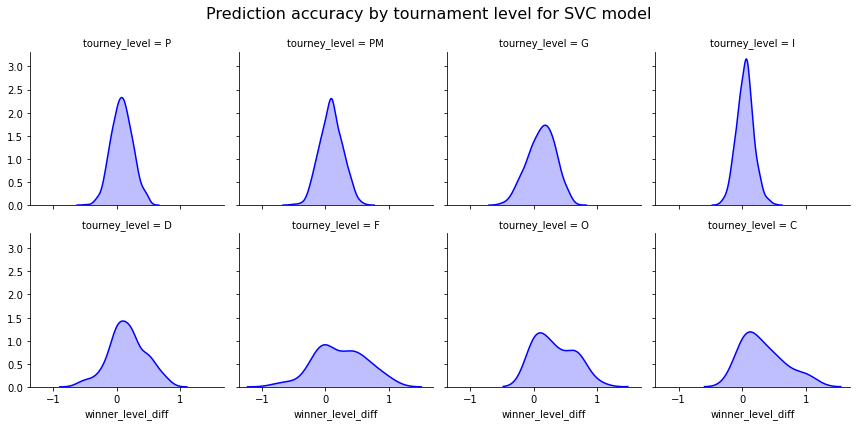

In [79]:
# What explains the increase in predictive accuracy for C, and to a lesser extent F and D, for matches won by
# lower-ranked players?

# For F and C, tourney_level win % seems to be a stronger predictor of winner.
# Same true for O, but this did not see improvement in predictive power for lower-ranked players winning.

grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4)
grid.map(sns.kdeplot, 'winner_level_diff', shade = True, color = 'blue')

grid.fig.suptitle('Prediction accuracy by tournament level for SVC model', size = 16)
grid.fig.subplots_adjust(top=.875)

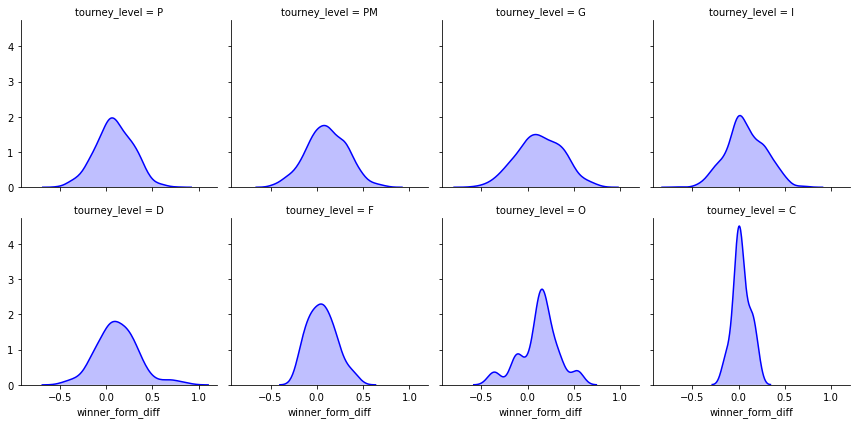

In [80]:
# For D and C, recent form seems to be a stronger predictor of winner

grid = sns.FacetGrid(data = pred_rows, col = 'tourney_level', col_wrap = 4)
grid.map(sns.kdeplot, 'winner_form_diff', shade = True, color = 'blue')

In [82]:
# For F, there is little variation in ranking, so other features have more predictive power

from scipy.stats import iqr
D = pred_rows[pred_rows['tourney_level'] == 'D']['player_1_rank']
print('Fed Cup:', 'Standard deviation', D.std())

C = pred_rows[pred_rows['tourney_level'] == 'C']['player_1_rank']
print('Challenger:', 'Standard deviation', C.std())

F = pred_rows[pred_rows['tourney_level'] == 'F']['player_1_rank']
print('WTA Finals:', 'Standard deviation', F.std())

Fed Cup: Standard deviation 57.04258875746602
Challenger: Standard deviation 71.18814250973912
WTA Finals: Standard deviation 7.916900335634507


In [83]:
all_ranks = pd.concat([pred_rows['player_1_rank'], pred_rows['player_2_rank']])
cutoffs = np.insert(np.quantile(all_ranks, np.linspace(.1,1,10)), 0, 0)

In [84]:
pred_rows['player_1_bins'] = pd.cut(pred_rows['player_1_rank'],
                                    bins = cutoffs)

pred_rows['player_2_bins'] = pd.cut(pred_rows['player_2_rank'],
                                    bins = cutoffs)

In [85]:
rank_diffs = matches3[['tourney_level', 'log_rank_ratio']].copy()
rank_diffs['log_rank_ratio'] = np.abs(rank_diffs['log_rank_ratio'])
rank_diffs.groupby('tourney_level').agg('mean')

,log_rank_ratio
tourney_level,
C,0.674955
D,1.198188
F,0.830022
G,1.448388
I,0.935632
O,1.377564
P,1.173476
PM,1.235209


In [86]:
gps = pred_rows.groupby(['player_1_bins', 'player_2_bins'])

mean_by_bin = gps.agg({'lower_ranked_won': ['mean', 'size']}).reset_index()

mean_by_bin = mean_by_bin.dropna(how = 'any', axis = 0)
mean_by_bin = mean_by_bin.sort_values(by = ('lower_ranked_won', 'mean'),
                                      axis = 0,
                                      ascending = False)

mean_by_bin.head(20)

# Unsurprisingly, in matches where players' rankings are relatively close, the lower-ranked player
# has a higher chance of winning
# This scenario occurs most frequently in C and F.

player_1_bins  player_2_bins lower_ranked_won     
                                             mean size
43   (22.0, 29.0]   (15.0, 22.0]         0.625000   40
55   (29.0, 39.0]   (29.0, 39.0]         0.625000   32
45   (22.0, 29.0]   (29.0, 39.0]         0.611111   36
34   (15.0, 22.0]   (22.0, 29.0]         0.575758   33
76   (51.0, 67.0]   (39.0, 51.0]         0.571429   35
65   (39.0, 51.0]   (29.0, 39.0]         0.571429   35
89   (67.0, 93.0]  (93.0, 992.0]         0.500000   46
79   (51.0, 67.0]  (93.0, 992.0]         0.500000   46
31   (15.0, 22.0]    (5.0, 10.0]         0.487805   41
66   (39.0, 51.0]   (39.0, 51.0]         0.483871   31
77   (51.0, 67.0]   (51.0, 67.0]         0.482759   29
99  (93.0, 992.0]  (93.0, 992.0]         0.482143   56
35   (15.0, 22.0]   (29.0, 39.0]         0.476190   42
36   (15.0, 22.0]   (39.0, 51.0]         0.468085   47
97  (93.0, 992.0]   (51.0, 67.0]         0.466667   45
56   (29.0, 39.0]   (39.0, 51.0]         0.454545   44
62   (39.0, 51.0]   (10.0, 15.0]         0.447368   38
11    (5.0, 10.0]    (5.0, 10.0]         0.444444   36
12    (5.0, 10.0]   (10.0, 15.0]         0.444444   27
67   (39.0, 51.0]   (51.0, 67.0]         0.441176   34

In [87]:
mean_by_bin.tail(20)

player_1_bins player_2_bins lower_ranked_won     
                                            mean size
26   (10.0, 15.0]  (39.0, 51.0]         0.214286   42
16    (5.0, 10.0]  (39.0, 51.0]         0.214286   28
40   (22.0, 29.0]    (0.0, 5.0]         0.211538   52
91  (93.0, 992.0]   (5.0, 10.0]         0.210526   19
2      (0.0, 5.0]  (10.0, 15.0]         0.205882   34
41   (22.0, 29.0]   (5.0, 10.0]         0.200000   35
20   (10.0, 15.0]    (0.0, 5.0]         0.200000   50
71   (51.0, 67.0]   (5.0, 10.0]         0.193548   31
18    (5.0, 10.0]  (67.0, 93.0]         0.178571   28
5      (0.0, 5.0]  (29.0, 39.0]         0.176471   34
8      (0.0, 5.0]  (67.0, 93.0]         0.160000   25
60   (39.0, 51.0]    (0.0, 5.0]         0.157895   38
61   (39.0, 51.0]   (5.0, 10.0]         0.142857   35
82   (67.0, 93.0]  (10.0, 15.0]         0.142857   14
7      (0.0, 5.0]  (51.0, 67.0]         0.133333   30
90  (93.0, 992.0]    (0.0, 5.0]         0.125000   16
6      (0.0, 5.0]  (39.0, 51.0]         0.117647   17
70   (51.0, 67.0]    (0.0, 5.0]         0.073171   41
50   (29.0, 39.0]    (0.0, 5.0]         0.054054   37
80   (67.0, 93.0]    (0.0, 5.0]         0.032258   31

In [88]:
#End by looking at some interesting examples of when the model worked well and when it didn't work well.

pred_rows_whole = matches3.loc[pred_rows.index].copy()

In [89]:
pred_rows_whole['correct'] = pred_rows['correct'].copy()
pred_rows_whole['lower_ranked_won'] = pred_rows['lower_ranked_won'].copy()

In [90]:
mask_correct = ((pred_rows_whole['correct'] == True) 
                & (pred_rows_whole['lower_ranked_won'] == True))
mask_incorrect = ((pred_rows_whole['correct'] == False) 
                  & (pred_rows_whole['lower_ranked_won'] == False))
pd.set_option('display.max_rows', 500)

In [91]:
pred_rows_whole[mask_correct][['tourney_name',
                               'tourney_date',
                               'player_1_name',
                               'player_1_rank',
                               'player_2_name',
                               'player_2_rank',
                               'winner'
                              ]].sort_values(by = 'tourney_date', axis = 0)

# notable examples:
#    [22203, 15132, 20126, 52226]

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
5458,Tokyo,2001-09-17,Arantxa Sanchez Vicario,19.0,Sandrine Testud,14.0,Arantxa Sanchez Vicario
6814,Miami,2002-03-18,Kim Clijsters,5.0,Monica Seles,6.0,Monica Seles
7051,Charleston,2002-04-15,Meghann Shaughnessy,12.0,Paola Suarez,47.0,Paola Suarez
7204,Fed Cup WG R1: ARG vs FRA,2002-04-27,Paola Suarez,42.0,Sandrine Testud,11.0,Paola Suarez
7260,Hamburg,2002-04-30,Magui Serna,39.0,Tatiana Panova,22.0,Magui Serna
7484,Madrid,2002-05-20,Cara Black,44.0,Tamarine Tanasugarn,20.0,Cara Black
7641,Roland Garros,2002-05-27,Anne Kremer,25.0,Chanda Rubin,45.0,Chanda Rubin
7655,Roland Garros,2002-05-27,Jennifer Capriati,1.0,Serena Williams,3.0,Serena Williams
7947,Wimbledon,2002-06-24,Justine Henin,6.0,Monica Seles,4.0,Justine Henin
7918,Wimbledon,2002-06-24,Chanda Rubin,27.0,Iroda Tulyaganova,20.0,Chanda Rubin


In [92]:
pred_rows_whole[mask_incorrect][['tourney_name',
                                 'tourney_date',
                                 'player_1_name',
                                 'player_1_rank',
                                 'player_2_name',
                                 'player_2_rank',
                                 'winner'
                                ]].sort_values(by = 'tourney_date', axis = 0)

# notable examples:
#    [19899, 36997, 37584, 39176]

,tourney_name,tourney_date,player_1_name,player_1_rank,player_2_name,player_2_rank,winner
8314,Montreal,2002-08-12,Jelena Dokic,5.0,Martina Hingis,8.0,Jelena Dokic
8563,Tokyo,2002-09-16,Henrieta Nagyova,50.0,Tatiana Panova,22.0,Tatiana Panova
8731,Filderstadt,2002-10-07,Iva Majoli,28.0,Rita Grande,37.0,Iva Majoli
8772,Zurich,2002-10-14,Conchita Martinez,47.0,Patty Schnyder,19.0,Patty Schnyder
8975,Sydney,2003-01-06,Magdalena Maleeva,14.0,Silvia Farina Elia,16.0,Magdalena Maleeva
9425,Scottsdale,2003-02-24,Ai Sugiyama,25.0,Alexandra Stevenson,26.0,Ai Sugiyama
9761,Indian Wells,2003-03-05,Kim Clijsters,3.0,Lindsay Davenport,7.0,Kim Clijsters
10481,Rome,2003-05-12,Ai Sugiyama,16.0,Patty Schnyder,19.0,Ai Sugiyama
10753,Birmingham,2003-06-09,Eleni Daniilidou,14.0,Magdalena Maleeva,13.0,Magdalena Maleeva
11012,Fed Cup WG PO: SUI vs ISR,2003-07-19,Anna Smashnova,27.0,Patty Schnyder,19.0,Patty Schnyder


In [93]:
# failures:

matches3.loc[[19899, 36997, 37584, 39176]][['player_1_name',
                                            'player_2_name',
                                            'tourney_name',
                                            'tourney_date',
                                            'winner',
                                            'player_1_rank',
                                            'player_2_rank',
                                            'player_1_level_win_pct',
                                            'player_2_level_win_pct',
                                            'player_1_surface_win_pct',
                                            'player_2_surface_win_pct',
                                            'player_1_h2h',
                                            'player_2_h2h',
                                            'player_1_recent_form',
                                            'player_2_recent_form'
                                          ]]

# In each case, losing player led in all categories except rank.

,player_1_name,player_2_name,tourney_name,tourney_date,winner,player_1_rank,player_2_rank,player_1_level_win_pct,player_2_level_win_pct,player_1_surface_win_pct,player_2_surface_win_pct,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form
19899,Chanda Rubin,Martina Sucha,Quebec City,2006-10-30,Martina Sucha,487.0,79.0,0.685714,0.512000,0.613333,0.466102,0.0,0.0,0.632479,0.606642
36997,Marion Bartoli,Svetlana Kuznetsova,Indian Wells,2013-03-04,Marion Bartoli,11.0,46.0,0.574074,0.645570,0.643735,0.667546,2.0,3.0,0.834048,0.897345
37584,Flavia Pennetta,Kirsten Flipkens,Roland Garros,2013-05-27,Kirsten Flipkens,122.0,21.0,0.566667,0.451613,0.666667,0.314286,1.0,0.0,0.625862,0.666576
39176,Ekaterina Makarova,Vera Zvonareva,Pattaya,2014-01-27,Ekaterina Makarova,28.0,992.0,0.491803,0.786765,0.458065,0.673267,2.0,1.0,0.718332,0.676519


In [94]:
# successes:

matches3.loc[[22203, 15132, 20126, 52226]][['player_1_name',
                                            'player_2_name',
                                            'tourney_name',
                                            'tourney_date',
                                            'winner',
                                            'tourney_name',
                                            'player_1_rank',
                                            'player_2_rank',
                                            'player_1_level_win_pct',
                                            'player_2_level_win_pct',
                                            'player_1_surface_win_pct',
                                            'player_2_surface_win_pct',
                                            'player_1_h2h',
                                            'player_2_h2h',
                                            'player_1_recent_form',
                                            'player_2_recent_form'
                                          ]]

# Vesnina/Azarenka: player ranked 683 beat player ranked 16, correctly predicted.
#     Reason? Azarenka ahead in all quantitative categories; especially notable is 7-0 H2H
# Clijsters/Sharapova: Both very high recent form, but Clijsters with large edge in surface win %
# Lisicki/Williams: No H2H, recent form same, but Williams had much higher level and surface win %s

,player_1_name,player_2_name,tourney_name,tourney_date,winner,tourney_name,player_1_rank,player_2_rank,player_1_level_win_pct,player_2_level_win_pct,player_1_surface_win_pct,player_2_surface_win_pct,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form
22203,Daniela Hantuchova,Lindsay Davenport,Bali,2007-09-10,Lindsay Davenport,Bali,12.0,234.0,0.596154,0.894737,0.596567,0.840278,0.0,6.0,0.811692,0.840000
15132,Elena Dementieva,Kim Clijsters,Indian Wells,2005-03-09,Kim Clijsters,Indian Wells,5.0,133.0,0.625000,0.750000,0.636364,0.802956,1.0,5.0,0.871583,0.794304
20126,Nadia Petrova,Serena Williams,Australian Open,2007-01-15,Serena Williams,Australian Open,6.0,81.0,0.691358,0.872881,0.638191,0.866667,1.0,4.0,0.845935,1.114003
52226,Julia Goerges,Serena Williams,Wimbledon,2018-07-02,Serena Williams,Wimbledon,13.0,181.0,0.511905,0.891176,0.513514,0.905660,0.0,3.0,0.771743,1.142745


In [95]:
idxs = pred_rows['prediction'].apply(lambda x: int(re.findall('\d', x)[0])-1)
probs = log_best.predict_proba(X_test_log)

In [96]:
pred_rows['prob_of_predicted_winner'] = [prob[idx] for (prob, idx) in zip(probs, idxs)]
pred_rows

,surface,tourney_level,target,prediction,player_1_rank,player_2_rank,player_1_h2h,player_2_h2h,player_1_recent_form,player_2_recent_form,...,player_1_level_win_pct,player_2_level_win_pct,correct,lower_ranked_won,winner_level_diff,winner_surface_diff,winner_form_diff,player_1_bins,player_2_bins,prob_of_predicted_winner
53876,Hard,P,player_2,player_1,33.0,31.0,0.0,1.0,0.724938,0.694368,...,0.483871,0.300000,False,False,-0.183871,-0.039853,-0.030570,"(29.0, 39.0]","(29.0, 39.0]",0.692220
14291,Carpet,PM,player_1,player_2,19.0,12.0,0.0,1.0,0.793210,1.142335,...,0.565217,0.815789,False,True,-0.250572,-0.184524,-0.349125,"(15.0, 22.0]","(10.0, 15.0]",0.734022
29603,Grass,G,player_1,player_1,46.0,26.0,1.0,0.0,0.804789,0.750116,...,0.633333,0.416667,True,True,0.216667,0.033333,0.054672,"(39.0, 51.0]","(22.0, 29.0]",0.645154
48275,Hard,I,player_1,player_1,44.0,90.0,0.0,0.0,0.703887,0.628646,...,0.598802,0.457143,True,False,0.141660,0.030973,0.075241,"(39.0, 51.0]","(67.0, 93.0]",0.584155
11061,Hard,P,player_2,player_1,15.0,24.0,2.0,0.0,0.854602,0.755808,...,0.542373,0.400000,False,True,-0.142373,-0.082712,-0.098794,"(10.0, 15.0]","(22.0, 29.0]",0.566204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,Carpet,P,player_2,player_2,20.0,10.0,0.0,1.0,0.742685,1.082090,...,0.344828,0.790698,True,False,0.445870,0.317460,0.339405,"(15.0, 22.0]","(5.0, 10.0]",0.886683
47493,Hard,I,player_2,player_2,51.0,61.0,1.0,0.0,0.697028,0.731345,...,0.512195,0.534483,True,True,0.022288,0.049057,0.034318,"(39.0, 51.0]","(51.0, 67.0]",0.556443
28310,Hard,D,player_2,player_2,26.0,12.0,0.0,1.0,0.777548,0.862380,...,0.619048,0.750000,True,False,0.130952,0.073773,0.084832,"(22.0, 29.0]","(10.0, 15.0]",0.615836
25937,Hard,PM,player_2,player_2,59.0,49.0,0.0,2.0,0.394737,0.794396,...,0.318182,0.519231,True,False,0.201049,0.206848,0.399659,"(51.0, 67.0]","(39.0, 51.0]",0.783208


In [97]:
pred_cols = X_train_log.columns

pred_cols_p1 = ['player_1_age',
                'log_player_1_rank',
                'player_1_recent_form',
                'player_1_surface_win_pct',
                'player_1_level_win_pct']

pred_cols_p2 = ['player_2_age',
                'log_player_2_rank',
                'player_2_recent_form',
                'player_2_surface_win_pct',
                'player_2_level_win_pct']

level_cols = list(filter(lambda c: 'tourney_level' in c, X_train_log.columns))
surface_cols = list(filter(lambda c: 'surface' in c and 'win' not in c, X_train_log.columns))

In [259]:
from datetime import datetime

In [274]:
def next_match(player1, player2, surface, tourney_level):
    global p1_surface_imputed, p2_surface_imputed, p1_level_imputed, p2_level_imputed
    
    s = pd.Series(dtype = 'float64')
    if player1 < player2:
        p1 = player1
        p2 = player2
    else:
        p1 = player2
        p2 = player1
    
    p1_mask = (matches3['player_1'] == p1) | (matches3['player_2'] == p1)
    p2_mask = (matches3['player_1'] == p2) | (matches3['player_2'] == p2)
    surface_mask = matches3['surface'] == surface
    level_mask = matches3['tourney_level'] == tourney_level
    
    p1_last_match = matches3[p1_mask].iloc[-1]
    p2_last_match = matches3[p2_mask].iloc[-1]
    p1_last_match_surface = matches3[p1_mask & surface_mask]
    p2_last_match_surface = matches3[p2_mask & surface_mask]
    p1_last_match_level = matches3[p1_mask & level_mask]
    p2_last_match_level = matches3[p2_mask & level_mask]
    
    if p1 == p1_last_match['player_1']:
        p1_string = 'player_1_'
    else:
        p1_string = 'player_2_'
        
    if p2 == p2_last_match['player_1']:
        p2_string = 'player_1_'
    else:
        p2_string = 'player_2_'
    
    s['player_1_recent_form'] = p1_last_match[p1_string + 'recent_form']
    s['player_2_recent_form'] = p2_last_match[p1_string + 'recent_form']
    
    p1_id = p1_last_match[p1_string + 'id']
    p1_most_recent_ranking = rankings[rankings['player_id'] == p1_id].iloc[-1]
    s['log_player_1_rank'] = np.log(p1_most_recent_ranking['ranking'])
    
    p2_id = p2_last_match[p2_string + 'id']
    p2_most_recent_ranking = rankings[rankings['player_id'] == p2_id].iloc[-1]
    s['log_player_2_rank'] = np.log(p2_most_recent_ranking['ranking'])
    
    years_ago = (matches3['tourney_date'].apply(lambda x: datetime.utcnow()-x).dt.days/365.2422)
    s['player_1_age'] = p1_last_match[p1_string + 'age'] + years_ago[p1_last_match.name]
    s['player_2_age'] = p2_last_match[p2_string + 'age'] + years_ago[p2_last_match.name]
    

    
    if p1_last_match_surface.shape[0] > 0:
        p1_last_match_surface = p1_last_match_surface.iloc[-1]
        if p1 == p1_last_match_surface['player_1']:
            p1_string = 'player_1_'
        else:
            p1_string = 'player_2_'
        
        s['player_1_surface_win_pct'] = p1_last_match_surface[p1_string + 'surface_win_pct']
    else:
        s['player_1_surface_win_pct'] = p1_last_match[p1_string + 'win_pct']
        p1_surface_imputed = True
        
        
    if p2_last_match_surface.shape[0] > 0:
        p2_last_match_surface = p2_last_match_surface.iloc[-1]
        if p2 == p2_last_match_surface['player_1']:
            p2_string = 'player_1_'
        else:
            p2_string = 'player_2_'
        
        s['player_2_surface_win_pct'] = p2_last_match_surface[p2_string + 'surface_win_pct']
    else:
        s['player_2_surface_win_pct'] = p2_last_match[p2_string + 'win_pct']
        p2_surface_imputed = True
    
    if p1_last_match_level.shape[0] > 0:
        p1_last_match_level = p1_last_match_level.iloc[-1]
        if p1 == p1_last_match_level['player_1']:
            p1_string = 'player_1_'
        else:
            p1_string = 'player_2_'
        
        s['player_1_level_win_pct'] = p1_last_match_level[p1_string + 'level_win_pct']
    else:
        s['player_1_level_win_pct'] = p1_last_match[p1_string + 'win_pct']
        p1_level_imputed = True
        
    if p2_last_match_level.shape[0] > 0:
        p2_last_match_level = p2_last_match_level.iloc[-1]
        if p2 == p2_last_match_level['player_1']:
            p2_string = 'player_1_'
        else:
            p2_string = 'player_2_'
        
        s['player_2_level_win_pct'] = p2_last_match_level[p2_string + 'level_win_pct']
    else:
        s['player_2_level_win_pct'] = p2_last_match[p2_string + 'win_pct']
        p2_level_imputed = True
        

    last_match = matches3[(matches3['player_1'] == p1) & (matches3['player_2'] == p2)]
    if last_match.shape[0] > 0:
        last_match = last_match.iloc[-1]
        s['player_1_h2h'] = last_match['player_1_h2h']
        s['player_2_h2h'] = last_match['player_2_h2h']
    else:
        s['player_1_h2h'] = 0
        s['player_2_h2h'] = 0
    
    for idx in surface_cols:
        if surface in idx:
            s[idx] = 1
        else:
            s[idx] = 0
            
    for idx in level_cols:
        if tourney_level in idx:
            s[idx] = 1
        else:
            s[idx] = 0
    
    s = s[pred_cols]
    return s

In [111]:
#player_list = 
current_ids = rankings[rankings['week'] >= '2018-01-01'].copy()
current_ids = current_ids['player_id']
current_ids

1098137    201594
1098138    202469
1098139    201496
1098140    201662
1098141    200748
            ...  
1207898    203288
1208120    223179
1208121    223179
1208122    223179
1208123    223179
Name: player_id, Length: 109258, dtype: int64

In [250]:
player_list_pt1 = matches3[((matches3['player_1_id'].isin(current_ids))
                             & (matches3['player_2_id'].isin(current_ids)))]['player_1']

player_list_pt2 = matches3[((matches3['player_1_id'].isin(current_ids))
                             & (matches3['player_2_id'].isin(current_ids)))]['player_2']

player_list = pd.concat([player_list_pt1, player_list_pt2])
player_list = sorted(player_list.unique().tolist())
player_list

tourney_dict = {'G': 'Grand Slam',
                'F': 'WTA Finals',
                'PM': 'Premier Mandatory',
                'P': 'Premier',
                'I': 'International',
                'C': 'Challenger',
                'D': 'Fed Cup',
                'O': 'Olympics'
}
bar_rows_dict = {
    'recent_form': 'Recent form',
    'surface_win_pct': 'Win percent on selected surface',
    'level_win_pct': 'Win percent at selected tournament level',
    'h2h': 'Head-to-head matches',
    'ranking': 'Ranking'
}

p1_indices = [
    'player_1_recent_form',
    'player_1_surface_win_pct',
    'player_1_level_win_pct',
    'player_1_h2h',
    'log_player_1_rank'
]

p2_indices = [
    'player_2_recent_form',
    'player_2_surface_win_pct',
    'player_2_level_win_pct',
    'player_2_h2h',
    'log_player_2_rank'
]

def set_ylabel(feature, surface, level):
    if feature == 'recent_form':
        return 'Recent Form'
    if feature == 'surface_win_pct':
        return 'Win Percent on ' + surface
    if feature == 'level_win_pct':
        return 'Win Percent in ' + tourney_dict[level] + ' Matches'
    if feature == 'h2h':
        return 'Head-to-Head Matches Won'
    if feature == 'ranking':
        return 'Player\'s Ranking'

In [310]:
import jupyter_dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input, Output
import pandas as pd

app = jupyter_dash.JupyterDash(__name__)

p1_surface_imputed = False
p2_surface_imputed = False
p1_level_imputed = False
p2_level_imputed = False

app.layout = html.Div([
    html.H1("Women's Tennis Association Match Predictor"),
    html.Hr(),
    html.Label([
        "Select first player",
        dcc.Dropdown(
            id='first-player',
            clearable = False,
            value='Serena Williams', options=[
                {'label': name, 'value': name}
                for name in player_list
            ], style={'width': '45%', 'marginBottom': 10})
    ]),
    html.Label([
        "Select second player",
        dcc.Dropdown(
            id='second-player',
            clearable = False,
            value='Venus Williams', options=[
                {'label': name, 'value': name}
                for name in player_list
            ], style={'width': '45%', 'marginBottom': 10})
    ]),
    html.Label([
        "Select Surface",
        dcc.Dropdown(
            id='surface',
            clearable = False,
            value='Hard', options=[
                {'label': surf, 'value': surf}
                for surf in ['Hard', 'Grass', 'Clay', 'Carpet']
            ], style={'width': '45%', 'marginBottom': 10})
    ]),
    html.Label([
        "Select tournament level",
        dcc.Dropdown(
            id='level',
            clearable = False,
            value='G', options=[
                {'label': tourney_dict[key], 'value': key}
                for key in tourney_dict.keys()
            ], style={'width': '45%', 'marginBottom': 10})
    ]),
    dcc.RadioItems(
                id='feature',
                options=[{'label': bar_rows_dict[key], 'value': key}
                         for key in bar_rows_dict.keys()],
                value='recent_form'
            ),
    html.Hr(),
    html.Div(id = 'prediction'),
    dcc.Graph(id = 'bar-graph')
], style = {'backgroundColor': '#F0F0F0', 'font-family':'sans-serif'})

@app.callback(
    Output('prediction', 'children'),
    [Input('first-player', 'value'),
     Input('second-player', 'value'),
     Input('surface', 'value'),
     Input('level', 'value')])

def update_prediction(player1, player2, surface, level):
    
    global p1_surface_imputed, p2_surface_imputed, p1_level_imputed, p2_level_imputed
    p1_surface_imputed = False
    p2_surface_imputed = False
    p1_level_imputed = False
    p2_level_imputed = False
    
    if player2 < player1:
        player1, player2 = player2, player1
    match_series = next_match(player1, player2, surface, level)
    prediction = log_best.predict(np.matrix(match_series))
    probability = log_best.predict_proba(np.matrix(match_series))
    if prediction == 'player_1':
        pred_statement = 'The predicted winner is ' + player1 + '.'
        p = probability[0,0]
        prob_statement = 'Her odds of winning are ' + str(round(p/(1-p), 2)) + ':1.'
    else:
        pred_statement = 'The predicted winner is ' + player2 + '.'
        p = probability[0,1]
        prob_statement = 'Her odds of winning are ' + str(round(p/(1-p), 2)) + ':1.'
        
    child = [html.H1(pred_statement), html.H2(prob_statement)]
    if p1_surface_imputed:
        child.append(html.H3('Note: ' + player1 + ' has played no matches on ' + surface.lower()
            + ' courts, so her overall win percent is used in place of her win percent on '
            + surface.lower() + '.'
        ))
    if p2_surface_imputed:
        child.append(html.H3('Note: ' + player2 + ' has played no matches on ' + surface.lower()
            + ' courts, so her overall win percent is used in place of her win percent on '
            + surface.lower() + '.'
        ))
    if p1_level_imputed:
        child.append(html.H3('Note: ' + player1 + ' has played no ' + tourney_dict[level]
            + ' events, so her overall win percent is used in place of her win percent at '
            + tourney_dict[level] + ' events.'
        ))
    if p2_level_imputed:
        child.append(html.H3('Note: ' + player2 + ' has played no ' + tourney_dict[level] +
            ' events, so her overall win percent is used in place of her win percent on '
            + tourney_dict[level] + ' events.'
        ))
    
    return child
    

@app.callback(
    Output('bar-graph', 'figure'),
    [Input('first-player', 'value'),
     Input('second-player', 'value'),
     Input('surface', 'value'),
     Input('level', 'value'),
     Input('feature', 'value')])

def update_figure(player1, player2, surface, level, feature):
    if player2 < player1:
        player1, player2 = player2, player1
    match_series = next_match(player1, player2, surface, level)
    p1_series = match_series[p1_indices]
    p2_series = match_series[p2_indices]
    p1_series.index = bar_rows_dict.keys()
    p2_series.index = bar_rows_dict.keys()
    p1_series['ranking'] = round(np.e**p1_series['ranking'])
    p2_series['ranking'] = round(np.e**p2_series['ranking'])
    
    match_df = pd.DataFrame({'player_1': p1_series, 'player_2': p2_series}).reset_index()
    match_df = pd.melt(match_df, 'index', ['player_1', 'player_2'])
    match_df.columns = match_df.columns.str.replace('variable', 'player')
    match_df.columns = match_df.columns.str.replace('index', 'feature')
    match_df['player'] = match_df['player'].str.replace('player_1', player1)
    match_df['player'] = match_df['player'].str.replace('player_2', player2)
    match_df = match_df.sort_values(by = 'player')
    
    fig = px.bar(
        data_frame = match_df[match_df['feature'] == feature],
        x = 'player',
        y = 'value',
        color = 'player',
        labels = {'player': 'Player\'s Name', 'value': set_ylabel(feature, surface, level)},
        color_discrete_sequence = ['#8300FF', '#FFD500']
    )
    
    fig.update_layout(
        transition_duration=500,
        paper_bgcolor='#F0F0F0',
        plot_bgcolor='#BBBBBB'
    )
    
    return fig

app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [242]:
player1 = 'Simona Halep'
player2 = 'Venus Williams'
surface = 'Hard'
level = 'G'
feature = 'h2h'

match_series = next_match(player1, player2, surface, level)
if player2 < player1:
    player1, player2 = player2, player1
p1_series = match_series[p1_indices]
p2_series = match_series[p2_indices]
p1_series.index = bar_rows_dict.values()
p2_series.index = bar_rows_dict.values()

match_df = pd.DataFrame({'player_1': p1_series, 'player_2': p2_series}).reset_index()
match_df = pd.melt(match_df, 'index', ['player_1', 'player_2'])
match_df.columns = match_df.columns.str.replace('variable', 'player')
match_df.columns = match_df.columns.str.replace('index', 'feature')
match_df['player'] = match_df['player'].str.replace('player_1', player1)
match_df['player'] = match_df['player'].str.replace('player_2', player2)
match_df#[match_df['feature'] == feature]

,feature,player,value
0,Recent form,Venus Williams,0.946237
1,Win percent on selected surface,Venus Williams,0.687097
2,Win percent at selected tournament level,Venus Williams,0.710744
3,Head-to-head matches,Venus Williams,3.000000
4,Ranking,Venus Williams,1.386294
5,Recent form,Simona Halep,0.769231
6,Win percent on selected surface,Simona Halep,0.770115
7,Win percent at selected tournament level,Simona Halep,0.780822
8,Head-to-head matches,Simona Halep,3.000000
9,Ranking,Simona Halep,3.951244


In [270]:
y = 3
z = 1
def testfunc(x):
    global y, z
    y += 1
    z -= 1
    return x
print(testfunc(4), y, z)

4 4 0


In [273]:
matches3[((matches3['player_1_name'] == 'Serena Williams') | (matches3['player_2_name'] == 'Serena Williams')) & (matches3['tourney_level'] == 'C')]

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,score,best_of,round,...,player_1_level_win_pct,player_2_level_win_pct,h2h_diff,recent_form_diff,surface_diff,level_diff,log_player_1_rank,log_player_2_rank,log_rank_ratio,age_diff


In [ ]:
#principal component analysis

from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_log)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
p = X_train_log.shape[1]

plt.plot(range(p), pca.explained_variance_ratio_)
plt.scatter(range(p), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

#two principal components much more important than the rest.

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X_train_log)

In [ ]:
X_train_std = x_train / np.std(x_train, 0)

In [ ]:
X_train_scaled = X_train_log.apply(lambda x: (x-x.mean())/x.std(), 0)
X_test_scaled = X_test_log.apply(lambda x: (x-x.mean())/x.std(), 0)

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

In [ ]:
p = X_train_scaled.shape[1]

plt.plot(range(p), pca.explained_variance_ratio_)
plt.scatter(range(p), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
logit_pca = LogisticRegression(solver = 'liblinear')

In [ ]:
pca = PCA(n_components = 15)

pca.fit(X_train_scaled)
X_train_scaled_15 = pca.transform(X_train_scaled)
X_test_scaled_15 = pca.transform(X_test_scaled)

In [ ]:
gs_params = {'C': 10**np.linspace(-2, 2, 26)}
gs = GridSearchCV(logit_pca, gs_params, cv = 5)

gs.fit(X_train_scaled_15, y_train)

logit_best = gs.best_estimator_

print(logit_best)
print(logit_best.score(X_train_scaled_15, y_train))
print(logit_best.score(X_test_scaled_15, y_test))

In [ ]:
matches3.columns

In [ ]:
matches4 = matches3.copy()

In [ ]:
matches4['level_win_pct_diff'] = matches4['player_1_level_win_pct'] - matches4['player_2_level_win_pct']
matches4['surface_win_pct_diff'] = matches4['player_1_surface_win_pct'] - matches4['player_2_surface_win_pct']
matches4['recent_form_diff'] = matches4['player_1_recent_form'] - matches4['player_2_recent_form']
matches4['log_rank_ratio'] = np.log(matches4['player_1_rank']/matches4['player_2_rank'])
matches4['h2h_diff'] = matches4['player_1_h2h'] - matches4['player_2_h2h']
matches4

In [ ]:
(np.log(matches4['player_1_rank']/matches4['player_2_rank'])).plot.hist(bins = 30)

In [ ]:
plt.scatter(data = matches4, x = 'surface_win_pct_diff', y = 'level_win_pct_diff')

In [ ]:
matches4[['surface_win_pct_diff', 'level_win_pct_diff']].corr()

In [ ]:
matches4['recent_form_diff'].plot.hist(bins = 30)

In [ ]:
(matches4['player_1_age'] - matches4['player_2_age']).plot.hist(bins = 30)

In [ ]:
matches4['age_diff'] = matches4['player_1_age'] - matches4['player_2_age']

In [ ]:
X2 = matches4.copy()
X2 = X2[['recent_form_diff',
               'surface_win_pct_diff',
               'level_win_pct_diff',
               'log_rank_ratio',
               'age_diff',
               'h2h_diff'
              ]]
y2 = matches4['target']

In [ ]:
X2

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
logit = LogisticRegression()

In [ ]:
gs_params = {'C': 10**np.linspace(-2, 2, 26)}
gs = GridSearchCV(logit, gs_params, cv = 5)

gs.fit(X2_train, y2_train)

logit_best = gs.best_estimator_

print(logit_best)
print(logit_best.score(X2_train, y2_train))
print(logit_best.score(X2_test, y2_test))

In [ ]:
X2_train_scaled = X2_train.copy()
X2_test_scaled = X2_test.copy()

X2_train_scaled = X2_train_scaled.apply(lambda x: (x-x.mean())/x.std(), 0)
X2_test_scaled = X2_test_scaled.apply(lambda x: (x-x.mean())/x.std(), 0)

In [ ]:
pca = PCA()
pca.fit(X2_train_scaled)

In [ ]:
p = X2_train_scaled.shape[1]

plt.plot(range(p), pca.explained_variance_ratio_)
plt.scatter(range(p), pca.explained_variance_ratio_)
plt.xlabel('ith components')
plt.ylabel('Percentage of Variance')
plt.show()

In [ ]:
pca=PCA()
pca.fit(X2_train_scaled)

In [ ]:
X2_train_scaled_all = pca.transform(X2_train_scaled)
X2_test_scaled_all = pca.transform(X2_test_scaled)

In [ ]:
logit = LogisticRegression(solver = 'liblinear')

gs_params = {'C': 10**np.linspace(-2, 2, 26)}
gs = GridSearchCV(logit, gs_params, cv = 5)

gs.fit(X2_train_scaled_all, y2_train)

logit_best = gs.best_estimator_

print(logit_best)
print(logit_best.score(X2_train_scaled_all, y2_train))
print(logit_best.score(X2_test_scaled_all, y2_test)) #using all principal components gives test score
                                                     #lower than train score.

In [ ]:
logit_best.predict(X2_test_scaled_all)

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X2_train_scaled_all, y2_train)

print(lda.score(X2_train_scaled_all, y2_train))
print(lda.score(X2_test_scaled_all, y2_test))

In [ ]:
pca.components_

In [ ]:
plt.scatter(data = X2_train_scaled, x = 'h2h_diff', y = 'recent_form_diff')

In [ ]:
rfc = RandomForestClassifier(max_features = 'sqrt')

gs_params = {'n_estimators': [500, 1000, 2000],
             'max_depth': [6]}

gs = GridSearchCV(rfc, gs_params, cv = 5)
gs.fit(X2_train, y2_train)

rfc_best = gs.best_estimator_

rfc_best.fit(X2_train, y2_train)

print(rfc_best)
print(rfc_best.score(X2_train, y2_train))
print(rfc_best.score(X2_test, y2_test))

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X2_train_scaled_all, y2_train)

print(lda.score(X2_train_scaled_all, y2_train))
print(lda.score(X2_test_scaled_all, y2_test))

In [ ]:
svc = SVC(kernel = 'poly')

gs_params = {'C': np.logspace(-1, np.log10(50), 5),
             'degree': [1,2]}

gs = GridSearchCV(svc, gs_params, cv = 5)

gs.fit(X2_train_scaled_all, y_train)
svc_best = gs.best_estimator_

print(svc_best)
print(svc_best.score(X2_train_scaled_all, y_train))
print(svc_best.score(X2_test_scaled_all, y_test))

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X2_train_scaled_all, y2_train)
print(gnb.score(X2_train_scaled_all, y2_train))
print(gnb.score(X2_test_scaled_all, y2_test))

In [ ]:
X2_train_scaled

In [ ]:
plt.scatter(data = X2_train_scaled, x = 'surface_win_pct_diff', y = 'level_win_pct_diff')

In [ ]:
PCA_df = pd.DataFrame(X2_train_scaled_all, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
PCA_df

In [ ]:
PCA_df.plot.scatter(x = 'PC3', y='PC5')

In [ ]:
sns.pairplot(PCA_df)

In [ ]:
lda.fit()